In [14]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
models = ["rPhyloConv", "MLP", "XGBoost", "ExtraTrees"]
#models = ["MLP", "XGBoost", "ExtraTrees"]
shuffles = list(range(1, 11))
model_aucs_list = []
for model in models:
    auc_list = []
    for shuffle in shuffles:
        y_test = np.load("{}/output_data/y_test_{}.npy".format(model, shuffle))
        y_pred = np.load("{}/output_data/y_pred_test_{}.npy".format(model, shuffle))
        auc_score = roc_auc_score(y_test, y_pred)
        auc_list.append(auc_score)
    model_aucs_list.append(auc_list)

model_aucs = np.array(model_aucs_list).transpose()

model_auc_df = pd.DataFrame(data = model_aucs, index = shuffles, columns = models)

In [28]:
model_aucs.shape

(10, 4)

In [29]:
model_auc_df

,rPhyloConv,MLP,XGBoost,ExtraTrees
1,0.819263,0.730083,0.705113,0.818074
2,0.785969,0.793103,0.671819,0.762188
3,0.776457,0.806183,0.673008,0.831748
4,0.866825,0.813317,0.629013,0.828775
5,0.826397,0.765755,0.677765,0.771106
6,0.724138,0.466112,0.655172,0.699168
7,0.856124,0.771700,0.613555,0.753270
8,0.870392,0.755054,0.608799,0.773484
9,0.719382,0.818074,0.636147,0.777051
10,0.859691,0.750297,0.688466,0.833532


'\nfor model in models:\n    box_count += 1\n    plt.figure(figsize = (10, 10))\n    # plot boxplot with seaborn\n    bplot = sns.boxplot(y = model, x = \'class_label_verbal\',\n                     data=dataset_df,\n                     width=0.5,\n                     palette="colorblind",\n                     showfliers=False)\n    # add stripplot to boxplot with Seaborn\n    bplot=sns.stripplot(y=feat_name, x=\'class_label_verbal\',\n                       data=dataset_df,\n                       jitter=True,\n                       marker=\'o\',\n                       alpha=0.5,\n                       color=\'black\')\n    plot_file_name="output_data/boxplot"+"_"+str(box_count)+".png"\n    # save as jpeg\n    bplot.figure.savefig(plot_file_name,\n                        format=\'png\',\n                        dpi=100)\n'

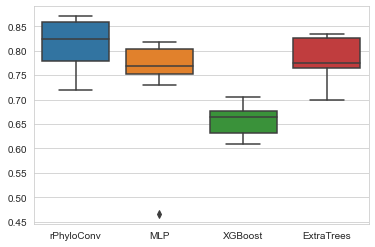

In [30]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = model_auc_df)